# 모델링 개요 : 무작정 따라하기

일단 모델링 해 봅시다.
* 목표 : 모델링 코드를 외운다!

## 0.환경준비

In [1]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원) 
import matplotlib.pyplot as plt  # 그래프
from sklearn.model_selection import train_test_split  # 데이터 분할

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

## 1.데이터 로딩

In [2]:
# 깃허브에 올려 놓은 예제 데이터를 가져와서 '데이터프레임'에 저장합니다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/advertising.csv'
data = pd.read_csv(path)

# 데이터프레임을 살짝 열어 봅니다.(상위 5개 행 조회)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* TV, Radio, Newspaper 광고비용 지출에 따른 판매액 데이터입니다.
* 광고비용을 어떻게 지출하느냐에 따라 매출액은 어떻게 달라질까요?

## 2.데이터 전처리

1) 데이터를 X와 y로 나누기
> * **X** : **features**, input, 조작변수, 요인, (독립변수)
* **y** : **target**, output, 결과변수, label, (종속변수) 

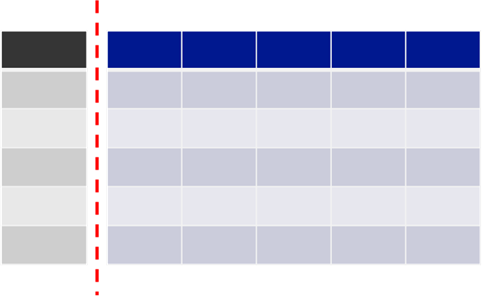

In [3]:
# 1) 먼저 x와 y로 분할
target = 'Sales'
x = data.drop(target, axis=1) # .drop(   , inplace = True)
y = data.loc[:, target] # : 처음부터 끝까지  data['Sales']

In [4]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

2) train, validation, test로 분할

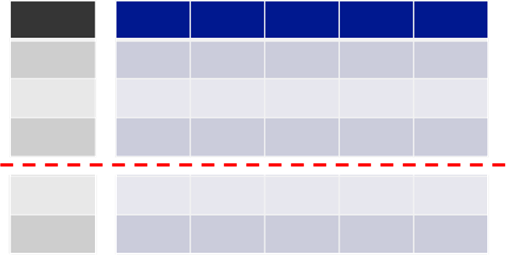

In [6]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

* 필요한 함수들 불러오기

In [7]:
# 알고리즘 불러오기 : 선형회귀
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기
from sklearn.metrics import mean_absolute_error #평균 오차 의미

* 모델 선언하기

In [8]:
# 모델 선언 : 알고리즘을 어떻게 사용할지 설정
model = LinearRegression()

* 학습

In [9]:
# 학습 : .fit   ==> 학습은 x와 y의 패턴을 찾아내는 과정입니다.
model.fit(x_train, y_train)

LinearRegression()

## 4.예측
* 학습의 결과 모델이 만들어 집니다.
* 모델이 얼마나 정확한지 검증해 봅시다.

In [10]:
pred = model.predict(x_test)

In [11]:
pred

array([ 9.98817024,  3.61715091, 14.15055506, 20.32786759,  9.88970156,
       16.98836304, 11.13676607,  9.68768919, 11.51487468, 16.77605733,
       11.9844579 , 10.45687197, 17.57315275, 12.85727346, 14.16494523,
       18.24022581, 12.25875422,  3.25091475, 12.49553154, 16.60989863,
       20.73837299, 13.69270679, 21.02522114, 22.03830416, 23.87851349,
       17.24241737, 16.84324391, 14.22110481, 12.75868186, 10.0098125 ,
        9.83985757, 22.89954101, 16.38865452, 13.90079567,  9.66622299,
       14.16395529,  6.6165319 , 12.80808814,  9.73417037,  6.90326431,
        5.19624946, 15.29883676, 10.30341301,  6.27455962,  4.10379802,
       11.4030755 , 13.83694948, 11.20125779, 19.23406644, 10.75523052,
       17.40764431, 17.16105089, 18.63095731, 14.0757542 , 15.6841725 ,
       15.12560157, 19.25474537, 12.01168458,  8.12966643, 17.53686372])

## 5.평가

In [12]:
# 평균 오차
mean_absolute_error(y_test, pred)

1.1282930424904485

# 실습1 : Diamond Price 예측
* 위 코드를 보면서 그대로 따라해보기
* copy & paste 보다는 보면서 따라 코딩하기를 권장합니다.

## 1.데이터 로딩

In [13]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv'
data = pd.read_csv(path)
data = data.sample(2000, random_state=2022)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


## 2.데이터 전처리

* 분할1 : x, y

In [14]:
target = 'price'
x = data.drop(target, axis=1)
y = data.loc[:, target]

* 가변수화

In [15]:
col_cat = ['cut','color','clarity']
x = pd.get_dummies(x, columns = col_cat, drop_first = True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

In [17]:
# 알고리즘 불러오기
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기
from sklearn.metrics import mean_absolute_error #평균 오차 의미

In [18]:
# 모델 선언
model = LinearRegression()

In [19]:
# 학습 : .fit
model.fit(x_train, y_train)

LinearRegression()

## 4.예측


In [21]:
# 예측 : .predict
pred = model.predict(x_test)
pred

array([ 2.20501344e+03,  7.52856789e+02,  7.67317403e+03,  5.05654930e+02,
        9.58922282e+03,  1.03311791e+04,  6.17537957e+02,  6.48866430e+03,
        5.02781402e+03,  6.01440323e+03,  1.30545630e+04, -4.20115860e+02,
        1.45458770e+03,  4.45953644e+03,  5.38351398e+03,  5.88822292e+03,
        6.39912991e+03,  5.34878640e+03,  4.29684909e+03,  9.31210328e+01,
        1.37340510e+04,  2.85873380e+02, -1.51496604e+03,  1.90055990e+03,
        1.61345598e+03,  6.48643230e+03,  3.17379810e+03,  2.41688206e+03,
        1.59183469e+03,  1.75556919e+03,  3.53265740e+03,  3.69387686e+02,
       -1.20417423e+02,  5.31533551e+03,  7.84596076e+03,  5.94994362e+03,
        1.43436441e+04,  7.41011029e+02,  4.62149721e+03,  7.62862776e+03,
        9.52827694e+03,  2.22114117e+03,  5.05685776e+03,  1.68401287e+02,
        8.07731615e+03,  1.50881660e+04,  4.22168234e+03,  5.44853731e+03,
        1.59660784e+03,  1.65701446e+03,  1.38740739e+03,  1.83232498e+03,
        3.92513428e+03,  

## 5.평가

In [22]:
# 평균 오차 : mean_absolute_error(실제값, 예측값)
mean_absolute_error(y_test, pred)

810.9111950866602

# 실습2 : 보스톤시 타운별 집값 예측
* 위 코드를 보면서 그대로 따라해보기
* copy & paste 보다는 보면서 따라 코딩하기를 권장합니다.

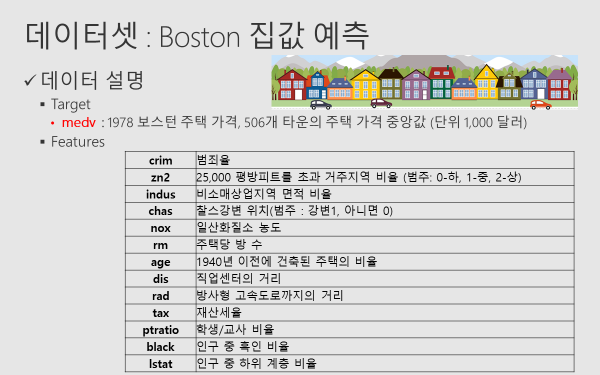

## 1.데이터 로딩

In [23]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
cols = ['crim','indus','chas','nox','rm', 'dis', 'tax','ptratio','lstat','medv']
data = pd.read_csv(path, usecols = cols)
data.head()

,crim,indus,chas,nox,rm,dis,tax,ptratio,lstat,medv
0,0.00632,2.31,0,0.538,6.575,4.0900,296,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,4.9671,242,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,4.9671,242,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,6.0622,222,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,6.0622,222,18.7,5.33,36.2


## 2.데이터 전처리

In [24]:
# 1) 먼저 x와 y로 분할
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [25]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

In [26]:
# 알고리즘 불러오기
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기 : 평균오차
from sklearn.metrics import mean_absolute_error

In [28]:
# 모델 선언
model = LinearRegression()

In [29]:
# 학습 : .fit
model.fit(x_train, y_train)

LinearRegression()

## 4.예측


In [31]:
# 예측 : .predict
pred = model.predict(x_test)

## 5.평가

In [32]:
# 평균 오차 : mean_absolute_error(실제값, 예측값)
mean_absolute_error(y_test, pred)

3.2500240951622557